In [1]:
import pandas as pd
% matplotlib inline 

In [2]:
solarIRR=pd.read_csv('mirabel solar sweeds.csv')

In [3]:
solarIRR=solarIRR.rename(columns=lambda x:x.strip())

In [4]:
solarIRR=solarIRR.drop('Unnamed: 5',axis=1)

In [5]:
solarIRR.columns

Index(['ELT', 'QR', 'HR', 'XMAX', 'MEAN'], dtype='object')

In [6]:
# dict to convert hours to the corresponding time slices
slices_equiv={20:'night',
              21:'night',
              22:'night',
              23:'night',
              24:'night',
              1:'night',
              2:'night',
              3:'night',
              4:'night',
              5:'night',
              6:'peak morning',
              7:'peak morning',
              8:'peak morning', # ts have one more extra hour for the morning peak in natem-quebec
              9:'day',
              10:'day',
              11:'day',
              12:'day',
              13:'day',
              14:'day',
              15:'day',
              16:'day',
              17:'peak evening',
              18:'peak evening',
              19:'peak evening',
}

In [7]:
solarIRR.loc[:,'dayts']=solarIRR['HR'].map(slices_equiv)

In [8]:
solarIRR.iloc[1:48]

,ELT,QR,HR,XMAX,MEAN,dayts
1,101,1,2,0.0,0.000,night
2,101,1,3,0.0,0.000,night
3,101,1,4,0.0,0.000,night
4,101,1,5,0.0,0.000,night
5,101,1,6,0.0,0.000,peak morning
6,101,1,7,19.0,0.719,peak morning
7,101,1,8,580.0,150.000,peak morning
8,101,1,9,1300.0,779.000,day
9,101,1,10,1860.0,1370.000,day
10,101,1,11,2230.0,1780.000,day


In [9]:
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==1) ,'TS']='WD'
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==2) ,'TS']='RD'
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==3) ,'TS']='SD'
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==4) ,'TS']='FD'

In [10]:
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==1) ,'TS']='WN'
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==2) ,'TS']='RN'
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==3) ,'TS']='SN'
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==4) ,'TS']='FN'

In [11]:
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==1) ,'TS']='WP1'
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==2) ,'TS']='RP1'
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==3) ,'TS']='SP1'
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==4) ,'TS']='FP1'

In [12]:
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==1) ,'TS']='WP2'
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==2) ,'TS']='RP2'
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==3) ,'TS']='SP2'
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==4) ,'TS']='FP2'

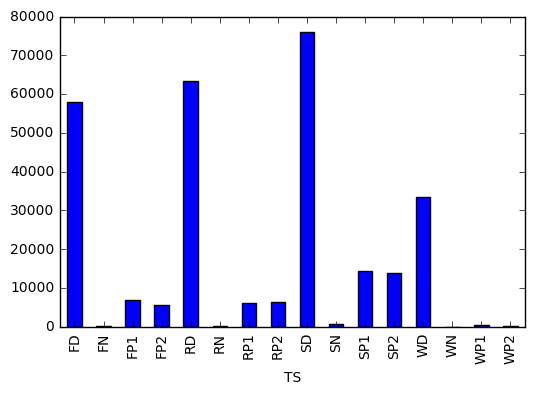

In [13]:
solarIRR.groupby('TS').sum().loc[:,'MEAN'].plot(kind='bar')

In [14]:
solar_ts_sum=solarIRR.groupby('TS').sum() 
# we sum it because the sum of solar IR per ts is a proxy of energy generated per ts
# and that takes into account the different duration of the TS, which are not taken
#into account with the mean

In [35]:
#solar_ts_sum.loc[:,'solar_fraction']=solar_ts_sum['MEAN']/solar_ts_sum['MEAN'].sum()

# so far I've calculated this with the sum of annual production.. but what if I use the average

solar_ts_sum.loc[:,'solar_fraction']=solar_ts_sum['MEAN']/solar_ts_sum['MEAN'].mean()

In [36]:
solar_ts_sum

,ELT,QR,HR,XMAX,MEAN,solar_fraction,solar_AF
TS,,,,,,,
FD,5824,224,700,120650.0,57861.000,3.249083,0.454872
FN,7280,280,875,29.0,1.059,0.000059,0.000008
FP1,2184,84,147,20107.0,6761.200,0.379663,0.053153
FP2,2184,84,378,20549.0,5558.820,0.312146,0.043700
RD,5824,112,700,137552.0,63360.000,3.557870,0.498102
RN,7280,140,875,38.0,1.681,0.000094,0.000013
RP1,2184,42,147,22788.0,6163.140,0.346080,0.048451
RP2,2184,42,378,21081.0,6358.510,0.357051,0.049987
SD,5824,168,700,131933.0,76073.000,4.271746,0.598044


solar_fraction is the % of the annual solar irradiation that occurs during that ts

In [38]:
solar_ts_sum['solar_fraction'].mean()

0.9999999999999998

In [39]:
solar_ts_sum['solar_AF']=solar_ts_sum['solar_fraction']*0.14/solar_ts_sum['solar_fraction'].mean()

In [ ]:
solar

In [40]:
solar_ts_sum.to_csv('solarAFperTS2.csv')

In [17]:
solardf=pd.DataFrame({'morning peak': [WP1,RP1,SP1,FP1],
              'evening peak': [WP2,RP2,SP2,FP2],
              'day': [WD,RD,SD,FD],
              'night':[WN,RN,SN,FN]
             },index=['winter','spring','summer','fall'])

NameError: name 'WP1' is not defined

In [19]:
solarIRR_av=solarIRR.groupby(['QR','HR']).mean()['MEAN']

In [20]:
solarIRR_av

QR  HR
1   1        0.000000
    2        0.000000
    3        0.000000
    4        0.000000
    5        0.000000
    6        0.000000
    7        0.102714
    8       54.467143
    9      350.571429
    10     567.285714
    11     717.428571
    12     793.428571
    13     786.142857
    14     697.857143
    15     539.714286
    16     310.757143
    17      33.188571
    18       0.000000
    19       0.000000
    20       0.000000
    21       0.000000
    22       0.000000
    23       0.000000
    24       0.000000
2   1        0.000000
    2        0.000000
    3        0.000000
    4        0.000000
    5        0.238571
    6       62.848571
             ...     
3   19     381.871429
    20      40.257143
    21       0.000000
    22       0.000000
    23       0.000000
    24       0.000000
4   1        0.000000
    2        0.000000
    3        0.000000
    4        0.000000
    5        0.041143
    6       58.228571
    7      303.357143
    8      604.300000
   

alternative, calculating the mean solar irradiation per ts

In [77]:
solar_ts_mean=solarIRR.groupby('TS').mean() 

In [45]:
solar_ts_mean['MEAN']

TS
FD     1033.232143
FN        0.015129
FP1     321.961905
FP2     264.705714
RD     1131.428571
RN        0.024014
RP1     293.482857
RP2     302.786190
SD     1358.446429
SN       10.081429
SP1     682.700000
SP2     657.004762
WD      595.398214
WN        0.000000
WP1      18.189952
WP2      11.062857
Name: MEAN, dtype: float64

In [50]:
duration= {'FD':     728,
           'FN':     910,
           'FP1':    273,
           'FP2':    273,
           'RD':     736,
           'RN':     920,
           'RP1':    276,
           'RP2':    276, 
           'SD':     736,
           'SN':     920,
           'SP1':    276,
           'SP2':    276,
           'WD' :    728,
           'WN' :    910,
           'WP1':    273,
           'WP2':    273,
          }

In [58]:
# it does not work

#pd.concat([solar_ts_mean,pd.Series(duration)])

In [78]:
solar_ts_mean['duration_h']=pd.Series(duration)

In [79]:
solar_ts_mean

,ELT,QR,HR,XMAX,MEAN,duration_h
TS,,,,,,
FD,104.0,4.0,12.5,2154.464286,1033.232143,728
FN,104.0,4.0,12.5,0.414286,0.015129,910
FP1,104.0,4.0,7.0,957.476190,321.961905,273
FP2,104.0,4.0,18.0,978.523810,264.705714,273
RD,104.0,2.0,12.5,2456.285714,1131.428571,736
RN,104.0,2.0,12.5,0.542857,0.024014,920
RP1,104.0,2.0,7.0,1085.142857,293.482857,276
RP2,104.0,2.0,18.0,1003.857143,302.786190,276
SD,104.0,3.0,12.5,2355.946429,1358.446429,736


In [87]:
(solar_ts_mean['MEAN']*solar_ts_mean['duration_h']).sum()/solar_ts_mean['duration_h'].sum()

424.63305132708814

roughly the average annuals solar irradiation, with something missed in the decimals

In [47]:
solarIRR['MEAN'].mean()

424.0097008928572

In [89]:
solar_ts_mean['CF']=solar_ts_mean['MEAN']/solarIRR['MEAN'].mean()*0.14

if we calculate the weighted average of the CF using the duration of the TS we get in effect the annual average CF ... 

or very close, The difference is probably because I am dividing by the average irradiance calculated from solarIRR instead of my transformed data

In [93]:
(solar_ts_mean['CF']*solar_ts_mean['duration_h']).sum()/solar_ts_mean['duration_h'].sum()

0.1402058185475676

In [95]:
solar_ts_mean.to_csv('solarAFperTS.csv')